In [1]:
cd C:\Users\Luv Rathore\Desktop\sigtuple\IPL

C:\Users\Luv Rathore\Desktop\sigtuple\IPL


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [5]:
data = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

In [6]:
# Encoding the names of Team and City

data.replace(['Koramangala Traffic Jammers','Electronic City Power Savers','Indranagar Pub Watchers',
              'Bellandur Froth Fighters','Marathalli Chokers ','Silkboard Slow Movers','Whitefield Water Loggers ',
              'Sarjapur Water Tankers','Airport Flyers','Forum Fans'],
             ['KTJ','EPS','IPW','BFF','MC','SSM','WWL','SWL','AF','FF'],inplace = True)
encode = {'Team 1': {'KTJ':1,'EPS':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'WWL':7,'SWL':8,'AF':9,'FF':10},
          'Team 2': {'KTJ':1,'EPS':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'WWL':7,'SWL':8,'AF':9,'FF':10},
          'City' : {'Bellandur':1,'Electronic City':2,'Indranagar':3,'Koramangala':4,'Marathalli':5,'Sarjapur':6,'Silkboard':7,
                    'Whitefield':8}
         }

# Getting the Year from Date of the Match
data.replace(encode, inplace=True)
data['Year'] = pd.to_datetime(data['DateOfGame']).dt.year

#data = data.drop(columns = ['DateOfGame','TimeOfGame'])

#Dimension Reduction 
data = data.drop(columns=['Team 1','Team 2','Year','DateOfGame','TimeOfGame','City','Game ID','DayOfWeek'])
data = data.drop(columns = ['AvgWindSpeed', 'AvgHumidity'])

In [7]:
# Encoding the names of Team and City

data2.replace(['Koramangala Traffic Jammers','Electronic City Power Savers','Indranagar Pub Watchers',
              'Bellandur Froth Fighters','Marathalli Chokers ','Silkboard Slow Movers','Whitefield Water Loggers ',
              'Sarjapur Water Tankers','Airport Flyers','Forum Fans','HSR High Rent Payers'],
             ['KTJ','EPS','IPW','BFF','MC','SSM','WWL','SWL','AF','FF','HSR'],inplace = True)
encode = {'Team 1': {'KTJ':1,'EPS':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'WWL':7,'SWL':8,'AF':9,'FF':10,'HSR':11},
          'Team 2': {'KTJ':1,'EPS':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'WWL':7,'SWL':8,'AF':9,'FF':10,'HSR' :11},
          'CityOfGame' : {'Bellandur':1,'Electronic City':2,'Indranagar':3,'Koramangala':4,'Marathalli':5,'Sarjapur':6,'Silkboard':7,
                   'Whitefield':8,'HSR':9}
          }
data2.replace(encode, inplace=True)

# Getting the Year from Date of the Match
#https://www.kaggle.com/tedllh/practice-on-python-date-and-time-manipulation
data2['Year'] = pd.to_datetime(data2['DateOfGame']).dt.year

#Dimension Reduction
#data2 = data2.drop(columns = ['DateOfGame','TimeOfGame'])
data2 = data2.drop(columns = ['Team 1','Team 2','Year','DateOfGame','TimeOfGame','CityOfGame','Game ID','Day'])
data2 = data2.drop(columns = ['AvgWindSpeed', 'AvgHumidity'])

In [8]:
# GETTING TOTAL NO. OF WICKETS TAKEN IN BOTH INNINGS

data['wickets_I1'] = data['Inn 1 Team 2 wickets taken_catches_runout']+data['Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping']

data['wickets_I2'] = data['Inn 2 Team 1 wickets taken_catches_runout']+data['Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping']

# data['wickets_I1'].apply(lambda x : 1 if (x >= 7) else 0)
# data['wickets_I2'].apply(lambda x : 1 if (x >= 7) else 0)
data['excess_wickets'] = data['wickets_I1'] - data['wickets_I2']

#data = data.drop(columns=['Inn 1 Team 2 wickets taken_catches_runout','Inn 2 Team 1 wickets taken_catches_runout'])

data2['wickets_I1'] = data2['Inn 1 Team 2 wickets taken_catches_runout']+data2['Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping']
data2['wickets_I2'] = data2['Inn 2 Team 1 wickets taken_catches_runout']+data2['Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping']

data2['excess_wickets'] = data2['wickets_I1'] - data2['wickets_I2']
# data2['wickets_I1'].apply(lambda x : 1 if (x >= 7) else 0)
# data2['wickets_I2'].apply(lambda x : 1 if (x >= 7) else 0);

#data2 = data2.drop(columns=['Inn 1 Team 2 wickets taken_catches_runout','Inn 2 Team 1 wickets taken_catches_runout'])

In [9]:
# ESTIMATING THE RUNS SCORED BY THE TEAM TAKING ONLY 4S AND 6S 

data['est_run_I1'] = 6*data['Inn 1 Team 1 Total 6s']+4*data['Inn 1 Team 1 Total 4s']
data['est_run_I2'] = 6*data['Inn 2 Team 2 Total 6s']+4*data['Inn 2 Team 2 Total 4s']

data['excess_runs'] = data['est_run_I1']-data['est_run_I2']

data2['est_run_I1'] = 6*data2['Inn 1 Team 1 Total 6s']+4*data2['Inn 1 Team 1 Total 4s']
data2['est_run_I2'] = 6*data2['Inn 1 Team 1 Total 6s']+4*data2['Inn 2 Team 2 Total 4s']

data2['excess_runs'] = data2['est_run_I1']-data2['est_run_I2']

In [10]:
# FINDING THE PERFORMANCE OF A TEAM BY DIVIDING ESTIMATED RUNS BY (NO. OF WICKETS + 2)

data['performance_I1'] = data['est_run_I1']/(data['wickets_I1']+2)
data['performance_I2'] = data['est_run_I2']/(data['wickets_I2']+2)

data2['performance_I1'] = data2['est_run_I1']/(data2['wickets_I1']+2)
data2['performance_I2'] = data2['est_run_I2']/(data2['wickets_I2']+2)

In [11]:
X = data.loc[:, data.columns != 'Winner (team 1=1, team 2=0)']
Y = data['Winner (team 1=1, team 2=0)']

X_t = data2.loc[:, data2.columns != 'Winner (team 1=1, team 2=0)']
Y_t = data2['Winner (team 1=1, team 2=0)']

In [12]:
# RANDOM FOREST CLASSIFIER

model1 = RandomForestClassifier(n_estimators= 50,criterion= 'gini',max_depth= 5,min_samples_leaf= 2,min_samples_split= 5 )
model1.fit(X,Y)

print('The training accuracy is ',cross_val_score(model1,X,Y,cv = 5).mean())
predicted = model1.predict(X_t)

print('The testing accuracy is ',metrics.accuracy_score(Y_t,predicted))

The training accuracy is  0.9326153846153847
The testing accuracy is  0.9078947368421053


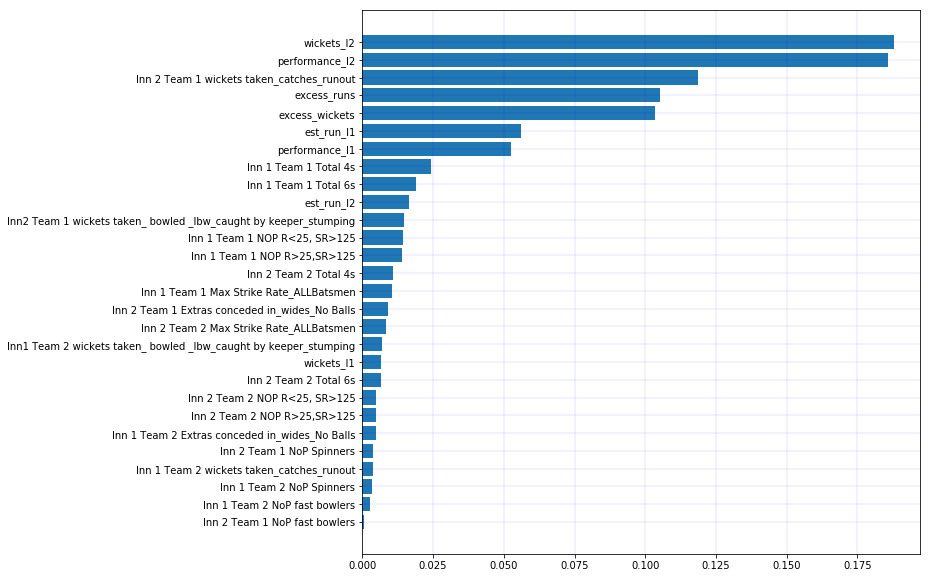

In [31]:
# PLOTTING FEATURE IMPORTANCES CHART

imp = model1.feature_importances_
names = X.columns

imp,names = zip(*sorted(zip(imp,names)))

plt.figure(figsize = (10,10))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.barh(range(len(names)),imp,align= 'center')
plt.yticks(range(len(names)),names)


plt.show()

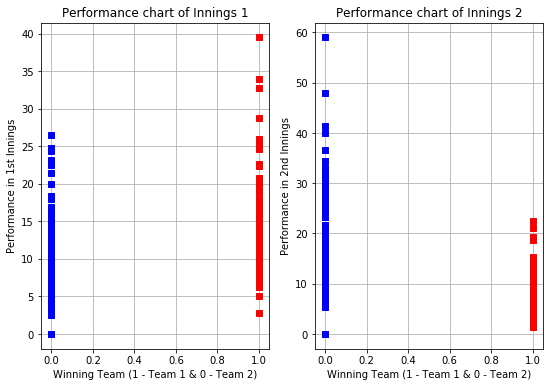

In [32]:
# plt.plot(data['performance_I1'],
temp = data[(data['Winner (team 1=1, team 2=0)'] == 1)]
temp2 = data[(data['Winner (team 1=1, team 2=0)'] == 0)]

plt.figure(1,figsize=(9,6))
plt.subplot(121)
plt.title('Performance chart of Innings 1')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Performance in 1st Innings')
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['performance_I1'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['performance_I1'],'bs')


plt.subplot(122)
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['performance_I2'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['performance_I2'],'bs')

plt.title('Performance chart of Innings 2')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Performance in 2nd Innings')


plt.show()

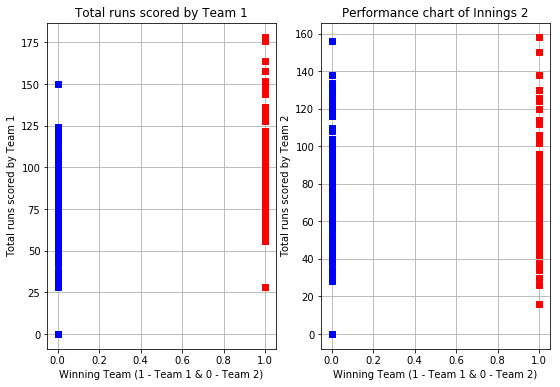

In [33]:
temp = data[(data['Winner (team 1=1, team 2=0)'] == 1)]
temp2 = data[(data['Winner (team 1=1, team 2=0)'] == 0)]

plt.figure(1,figsize=(9,6))
plt.subplot(121)
plt.title('Total runs scored by Team 1')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Total runs scored by Team 1')
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['est_run_I1'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['est_run_I1'],'bs')


plt.subplot(122)
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['est_run_I2'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['est_run_I2'],'bs')

plt.title('Performance chart of Innings 2')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Total runs scored by Team 2')


plt.show()

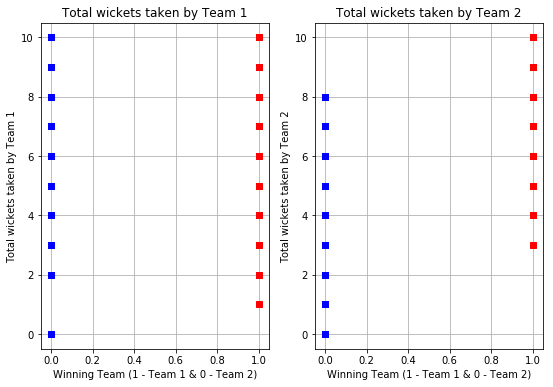

In [34]:
temp = data[(data['Winner (team 1=1, team 2=0)'] == 1)]
temp2 = data[(data['Winner (team 1=1, team 2=0)'] == 0)]

plt.figure(1,figsize=(9,6))
plt.subplot(121)
plt.title('Total wickets taken by Team 1')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Total wickets taken by Team 1')
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['wickets_I1'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['wickets_I1'],'bs')


plt.subplot(122)
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['wickets_I2'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['wickets_I2'],'bs')

plt.title('Total wickets taken by Team 2')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Total wickets taken by Team 2')


plt.show()

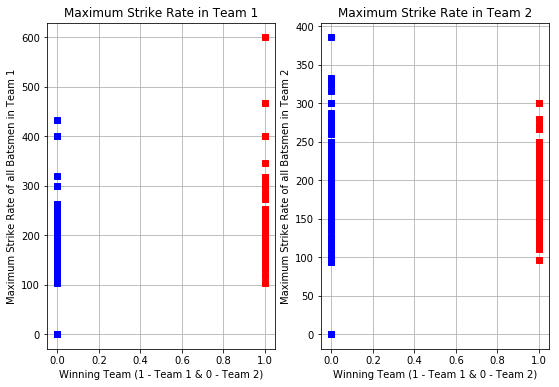

In [35]:
temp = data[(data['Winner (team 1=1, team 2=0)'] == 1)]
temp2 = data[(data['Winner (team 1=1, team 2=0)'] == 0)]

plt.figure(1,figsize=(9,6))
plt.subplot(121)
plt.title('Maximum Strike Rate in Team 1')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Maximum Strike Rate of all Batsmen in Team 1')
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'],'bs')


plt.subplot(122)
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'],'bs')

plt.title('Maximum Strike Rate in Team 2')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Maximum Strike Rate of all Batsmen in Team 2')


plt.show()

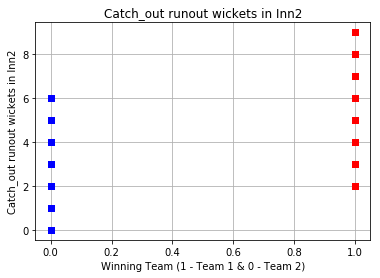

In [36]:
temp = data[(data['Winner (team 1=1, team 2=0)'] == 1)]
temp2 = data[(data['Winner (team 1=1, team 2=0)'] == 0)]

plt.title('Catch_out runout wickets in Inn2')
plt.xlabel('Winning Team (1 - Team 1 & 0 - Team 2)')
plt.ylabel('Catch_out runout wickets in Inn2')
plt.grid(linestyle='-')
plt.plot(temp['Winner (team 1=1, team 2=0)'],temp['Inn 2 Team 1 wickets taken_catches_runout'],'rs',temp2['Winner (team 1=1, team 2=0)'],temp2['Inn 2 Team 1 wickets taken_catches_runout'],'bs')


In [23]:
# HYPER PARAMETER TUNING 

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
parameters = {'n_estimators':(10,50,100),'criterion':('gini','entropy'),'min_samples_split':[2,5,12],'max_depth':[3,5,7],
              'min_samples_leaf':[2,5,10]} 
clf = GridSearchCV(model,parameters,cv = 5)
clf.fit(X,Y)

clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [38]:
# dot_data = StringIO()
# export_graphviz(model1, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters = True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# model = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,min_samples_leaf = 10,min_samples_split = 10)#min_samples_split = 2

# model.fit(X,Y)
# print(cross_val_score(model,X,Y,cv = 5).mean())
# predicted = model.predict(X_t)

# print(metrics.accuracy_score(Y_t,predicted))

# model = DecisionTreeClassifier()
# parameters = {'criterion':('gini','entropy'),'min_samples_split':[3,6,9],'max_depth':[3,5,7],'min_samples_split':[2,5,10],
#              'min_samples_leaf':[2,5,10]} 
# clf = GridSearchCV(model,parameters,cv = 5)
# clf.fit(X,Y)
# #model.fit(X,Y)

# clf.best_params_
# #clf.cv_results_
# #clf.predict(X_t)

# data['prob_run_I1'] = 40*data['Inn 1 Team 1 NOP R>25,SR>125']+15*data['Inn 1 Team 1 NOP R<25, SR>125']+data['Inn 1 Team 2 Extras conceded in_wides_No Balls']
# data['prob_run_I2'] = 40*data['Inn 2 Team 2 NOP R>25,SR>125']+15*data['Inn 2 Team 2 NOP R<25, SR>125']+data['Inn 2 Team 1 Extras conceded in_wides_No Balls']

# # data = data.drop(columns=['Inn 1 Team 1 NOP R>25,SR>125','Inn 2 Team 2 NOP R>25,SR>125',])

# data2['prob_run_I1'] = 40*data2['Inn 1 Team 1 NOP R>25,SR>125']+15*data2['Inn 1 Team 1 NOP R<25, SR>125']+data2['Inn 1 Team 2 Extras conceded in_wides_No Balls']
# data2['prob_run_I2'] = 40*data2['Inn 2 Team 2 NOP R>25,SR>125']+15*data2['Inn 2 Team 2 NOP R<25, SR>125']+data2['Inn 2 Team 1 Extras conceded in_wides_No Balls']

# # data2 = data2.drop(columns=['Inn 1 Team 1 NOP R>25,SR>125','Inn 2 Team 2 NOP R>25,SR>125'])


# min_max_scaler = preprocessing.MinMaxScaler()

# d1 = (min_max_scaler.fit_transform(data['wickets_I1'].reshape(-1,1))+2
# d2 = min_max_scaler.fit_transform(data['est_run_I1'].reshape(-1,1))
# data['performance_T1'] = d1*d2

# d1 = min_max_scaler.fit_transform(data['wickets_I2'].reshape(-1,1))
# d2 = min_max_scaler.fit_transform(data['est_run_I2'].reshape(-1,1))
# data['performance_T2'] = d1*d2;


# #data = data.drop(columns = ['Inn 1 Team 1 Max Strike Rate_ALLBatsmen','Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
# d1 = min_max_scaler.fit_transform(data2['wickets_I1'].reshape(-1,1))
# d2 = min_max_scaler.fit_transform(data2['est_run_I1'].reshape(-1,1))
# data2['performance_T1'] = d1*d2;

# d1 = min_max_scaler.fit_transform(data2['wickets_I2'].reshape(-1,1))
# d2 = min_max_scaler.fit_transform(data2['est_run_I2'].reshape(-1,1))
# data2['performance_T2'] = d1*d2

#data2 = data2.drop(columns = ['Inn 1 Team 1 Max Strike Rate_ALLBatsmen','Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])

# data['strike_diff'] = (data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen']- data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
# data2['strike_diff'] = (data2['Inn 1 Team 1 Max Strike Rate_ALLBatsmen']- data2['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])

# data = data.drop(columns=['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])
# data2 = data2.drop(columns=['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])



# data['extras'] = data['Inn 1 Team 2 Extras conceded in_wides_No Balls'] - data['Inn 2 Team 1 Extras conceded in_wides_No Balls']
# #data['extras'] = data['extras'].apply(lambda x : 1 if (x >= 7) else -1 if(x <= -7) else 0)

# data2['extras'] = data2['Inn 1 Team 2 Extras conceded in_wides_No Balls'] - data2['Inn 2 Team 1 Extras conceded in_wides_No Balls']
# #data2['extras'] = data2['extras'].apply(lambda x : 1 if (x >= 7) else -1 if(x <= -7) else 0)

# d_w = [0,0,0,0,0,0,0,0,0,0,0];
# d_l = [0,0,0,0,0,0,0,0,0,0,0];
# for val in range(0,len(data['Team 1'])) :
#     if (data['Winner (team 1=1, team 2=0)'][val] == 1):
#         d_w[data['Team 1'][val]] +=1;
#     else :
#         d_l[data['Team 1'][val]] +=1;
        
# d_w2 = [0,0,0,0,0,0,0,0,0,0,0];
# d_l2 = [0,0,0,0,0,0,0,0,0,0,0];
# for val in range(0,len(data['Team 2'])) :
#     if (data['Winner (team 1=1, team 2=0)'][val] == 1):
#         d_w2[data['Team 2'][val]] +=1;
#     else:   
#         d_l2[data['Team 2'][val]] +=1;
        
# Team 2 better @ batting first
# Team 4 better @ bowling first
# Team 5 better @ batting first